**регрессия на TensorFlow**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

1.13.1


In [3]:
# генеруем набор данных (случайные точки) 
n_observations = 100
xs = np.linspace(-3, 3, n_observations).reshape(n_observations,1)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations).reshape(n_observations,1)

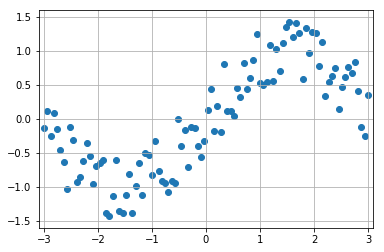

In [4]:
# рисуем набор данных
axes = plt.gca()
axes.set_xlim([-3.1,3.1])
axes.set_ylim([-1.6,1.6])

plt.scatter(xs, ys, label="data")
plt.grid(True)
plt.show()

In [5]:
# модифицируем набор данных для реализации полиномиальной регресии
from sklearn.preprocessing import PolynomialFeatures
xp = PolynomialFeatures(degree=3).fit_transform(xs)

In [6]:
# определяем переменные tensorflow для данных 
X = tf.placeholder(tf.float32,shape=(xp.shape))
Y = tf.placeholder(tf.float32)

In [7]:
# вектор весов
W = tf.Variable(tf.random_normal([xp.shape[1],1]), name='weight')
# коэффициент сдвига
b = tf.Variable(tf.zeros([1]), name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
Y_pred = tf.add(tf.matmul(X, W), b) # регрессия

In [9]:
# функция стоимости (потеря)
cost = tf.reduce_mean( tf.square(Y_pred - Y) )

learning_rate = 0.001 # скорость обучения

# минимизация функции стоимости методом градиентного спуска
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

n_epochs = int(1e4) # количество циклов обучения
training_cost_min = 0.09 # порог допустимой ошибки

with tf.Session() as sess: # создаём сессию для выполнения вычислений
    # sess.run(tf.initialize_all_variables()) # инициализируем переменные
    sess.run(tf.global_variables_initializer())
    
    # начальное состояние параметров регрессии
    yr0 = yr = Y_pred.eval( feed_dict={X: xp}, session=sess)
    
    for epoch_i in range(n_epochs): # цикл обучения
        sess.run(optimizer, feed_dict={X: xp, Y: ys}) # выполняем шаг обучения
        
        # оцениваем текущее состояние
        training_cost = sess.run( cost, feed_dict={X: xp, Y: ys}) 
        
        if not(epoch_i % 100): # печатаем состояние каждую 100 итерацию
            print("cost [",epoch_i,"]:",training_cost,end='\r')
        if training_cost < training_cost_min:
            break # останавливаемся, если достигнут порог ошибки 
     
    print("cost [",epoch_i,"]:",training_cost,end='\r')
    # рисуем результат
    yr = Y_pred.eval( feed_dict={X: xp}, session=sess)

Instructions for updating:
Use tf.cast instead.


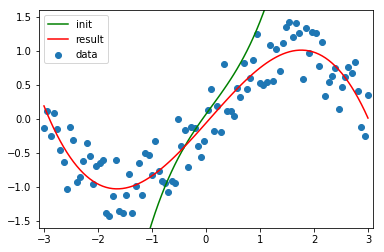

In [10]:
axes = plt.gca()
axes.set_xlim([-3.1,3.1])
axes.set_ylim([-1.6,1.6])

plt.scatter(xs, ys, label="data")
plt.plot(xs, yr0, '-', c='green',label='init') 
plt.plot(xs, yr, '-', c='red',label='result')
plt.legend( loc="upper left")
plt.show()
# plt.savefig('result/plot0.png', dpi=60)